## Trabalho de Estatística I (SME0620)
Prof. Dr. Vicente Garibay Cancho
### Alunos
- Lucas Lima Romero 13676325
- Marco Antonio Gaspar Garcia 11833581




Adicionando as bibliotecas necessárias

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cálculo das Medidas Resumo

In [51]:
# Abrindo o arquivo CSV e guardando em um DataFrame
dados = pd.read_csv('study_performance.csv')

# As variáveis quantitativas discretas que serão utilizadas para o cálculo das medidas resumo são 'math score', 'reading score' e 'writing score'
variaveis = ['math_score', 'reading_score', 'writing_score']

# Calculando as medidas resumo
medidas_resumo = dados[variaveis].describe()

# Exibindo as medidas resumo
print(medidas_resumo)


       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [52]:
# Printando as medidas resumo de forma mais completa

# Arredondar as medidas resumo
medidas_resumo_arredondadas = medidas_resumo.round(2)

for coluna in medidas_resumo_arredondadas.columns:

    media = medidas_resumo_arredondadas.loc['mean', coluna]
    desvio_padrao = medidas_resumo_arredondadas.loc['std', coluna]
    mediana = medidas_resumo_arredondadas.loc['50%', coluna]
    moda = dados[coluna].mode().values[0]  # Calcula a moda a partir do DataFrame original

    Q1 = dados[coluna].quantile(0.25)  # Calcula o primeiro quartil a partir do DataFrame original
    # O segundo quartil é a própria mediana, obtida anteriormente

    Q3 = dados[coluna].quantile(0.75)  # Calcula o terceiro quartil a partir do DataFrame original

    print(f"A média de {coluna} foi {media:.2f}")
    print(f"O desvio padrão de {coluna} foi {desvio_padrao:.2f}")
    print(f"A mediana de {coluna} foi {mediana:.2f}")
    print(f"A moda de {coluna} foi {moda:.2f}")
    print(f"O primeiro quartil de {coluna} foi {Q1:.2f}")
    print(f"O terceiro quartil de {coluna} foi {Q3:.2f}")
    print()

A média de math_score foi 66.09
O desvio padrão de math_score foi 15.16
A mediana de math_score foi 66.00
A moda de math_score foi 65.00
O primeiro quartil de math_score foi 57.00
O terceiro quartil de math_score foi 77.00

A média de reading_score foi 69.17
O desvio padrão de reading_score foi 14.60
A mediana de reading_score foi 70.00
A moda de reading_score foi 72.00
O primeiro quartil de reading_score foi 59.00
O terceiro quartil de reading_score foi 79.00

A média de writing_score foi 68.05
O desvio padrão de writing_score foi 15.20
A mediana de writing_score foi 69.00
A moda de writing_score foi 74.00
O primeiro quartil de writing_score foi 57.75
O terceiro quartil de writing_score foi 79.00



### Cálculo das Medidas de Dispersão

In [53]:
# Calculando a variância, desvio padrão, primeiro quartil, mediana, terceiro quartil e amplitude interquartil para cada variável
for coluna in variaveis:
    variancia = dados[coluna].var()
    desvio_padrao = dados[coluna].std()
    IQR = Q3 - Q1
    CV = (desvio_padrao / media) * 100
    amplitude = dados[coluna].max() - dados[coluna].min()

    print(f"A variância de {coluna} foi {variancia:.2f}")
    print(f"O desvio padrão de {coluna} foi {desvio_padrao:.2f}")
    print(f"A amplitude de {coluna} foi {amplitude:.2f}")
    print(f"A amplitude interquartil de {coluna} foi {IQR:.2f}")
    print(f"O coeficiente de variação de {coluna} foi {CV:.2f}%")
    print()

A variância de math_score foi 229.92
O desvio padrão de math_score foi 15.16
A amplitude de math_score foi 100.00
A amplitude interquartil de math_score foi 21.25
O coeficiente de variação de math_score foi 22.28%

A variância de reading_score foi 213.17
O desvio padrão de reading_score foi 14.60
A amplitude de reading_score foi 83.00
A amplitude interquartil de reading_score foi 21.25
O coeficiente de variação de reading_score foi 21.46%

A variância de writing_score foi 230.91
O desvio padrão de writing_score foi 15.20
A amplitude de writing_score foi 90.00
A amplitude interquartil de writing_score foi 21.25
O coeficiente de variação de writing_score foi 22.33%



### Tabelas de Frequência

In [54]:
# Variável qualitativa
qualitative_var = dados['parental_level_of_education'].value_counts()
qualitative_var_df = pd.DataFrame({'parental_level_of_education': qualitative_var.index, 'frequency': qualitative_var.values})

# Variável quantitativa
bins = np.arange(0, dados['math_score'].max() + 10, 10)
bins[0] = dados['math_score'].min() - 0.001  # Ajustar o limite inferior do primeiro intervalo
quantitative_var = pd.cut(dados['math_score'], bins=bins).value_counts().sort_index()
quantitative_var_df = pd.DataFrame({'math_score_range': quantitative_var.index.astype(str), 'frequency': quantitative_var.values})

print("Tabela de frequência para variável qualitativa (parental_level_of_education):\n")
print(qualitative_var_df.to_string(index=False)) # Exibir a tabela de frequência sem o índice
print("\nTabela de frequência para variável quantitativa (math_score):\n")
print(quantitative_var_df.to_string(index=False)) 

Tabela de frequência para variável qualitativa (parental_level_of_education):

parental_level_of_education  frequency
               some college        226
         associate's degree        222
                high school        196
           some high school        179
          bachelor's degree        118
            master's degree         59

Tabela de frequência para variável quantitativa (math_score):

math_score_range  frequency
         (0, 10]          1
        (10, 20]          2
        (20, 30]         12
        (30, 40]         34
        (40, 50]        100
        (50, 60]        189
        (60, 70]        270
        (70, 80]        215
        (80, 90]        126
       (90, 100]         50


### Gráfico de Barras

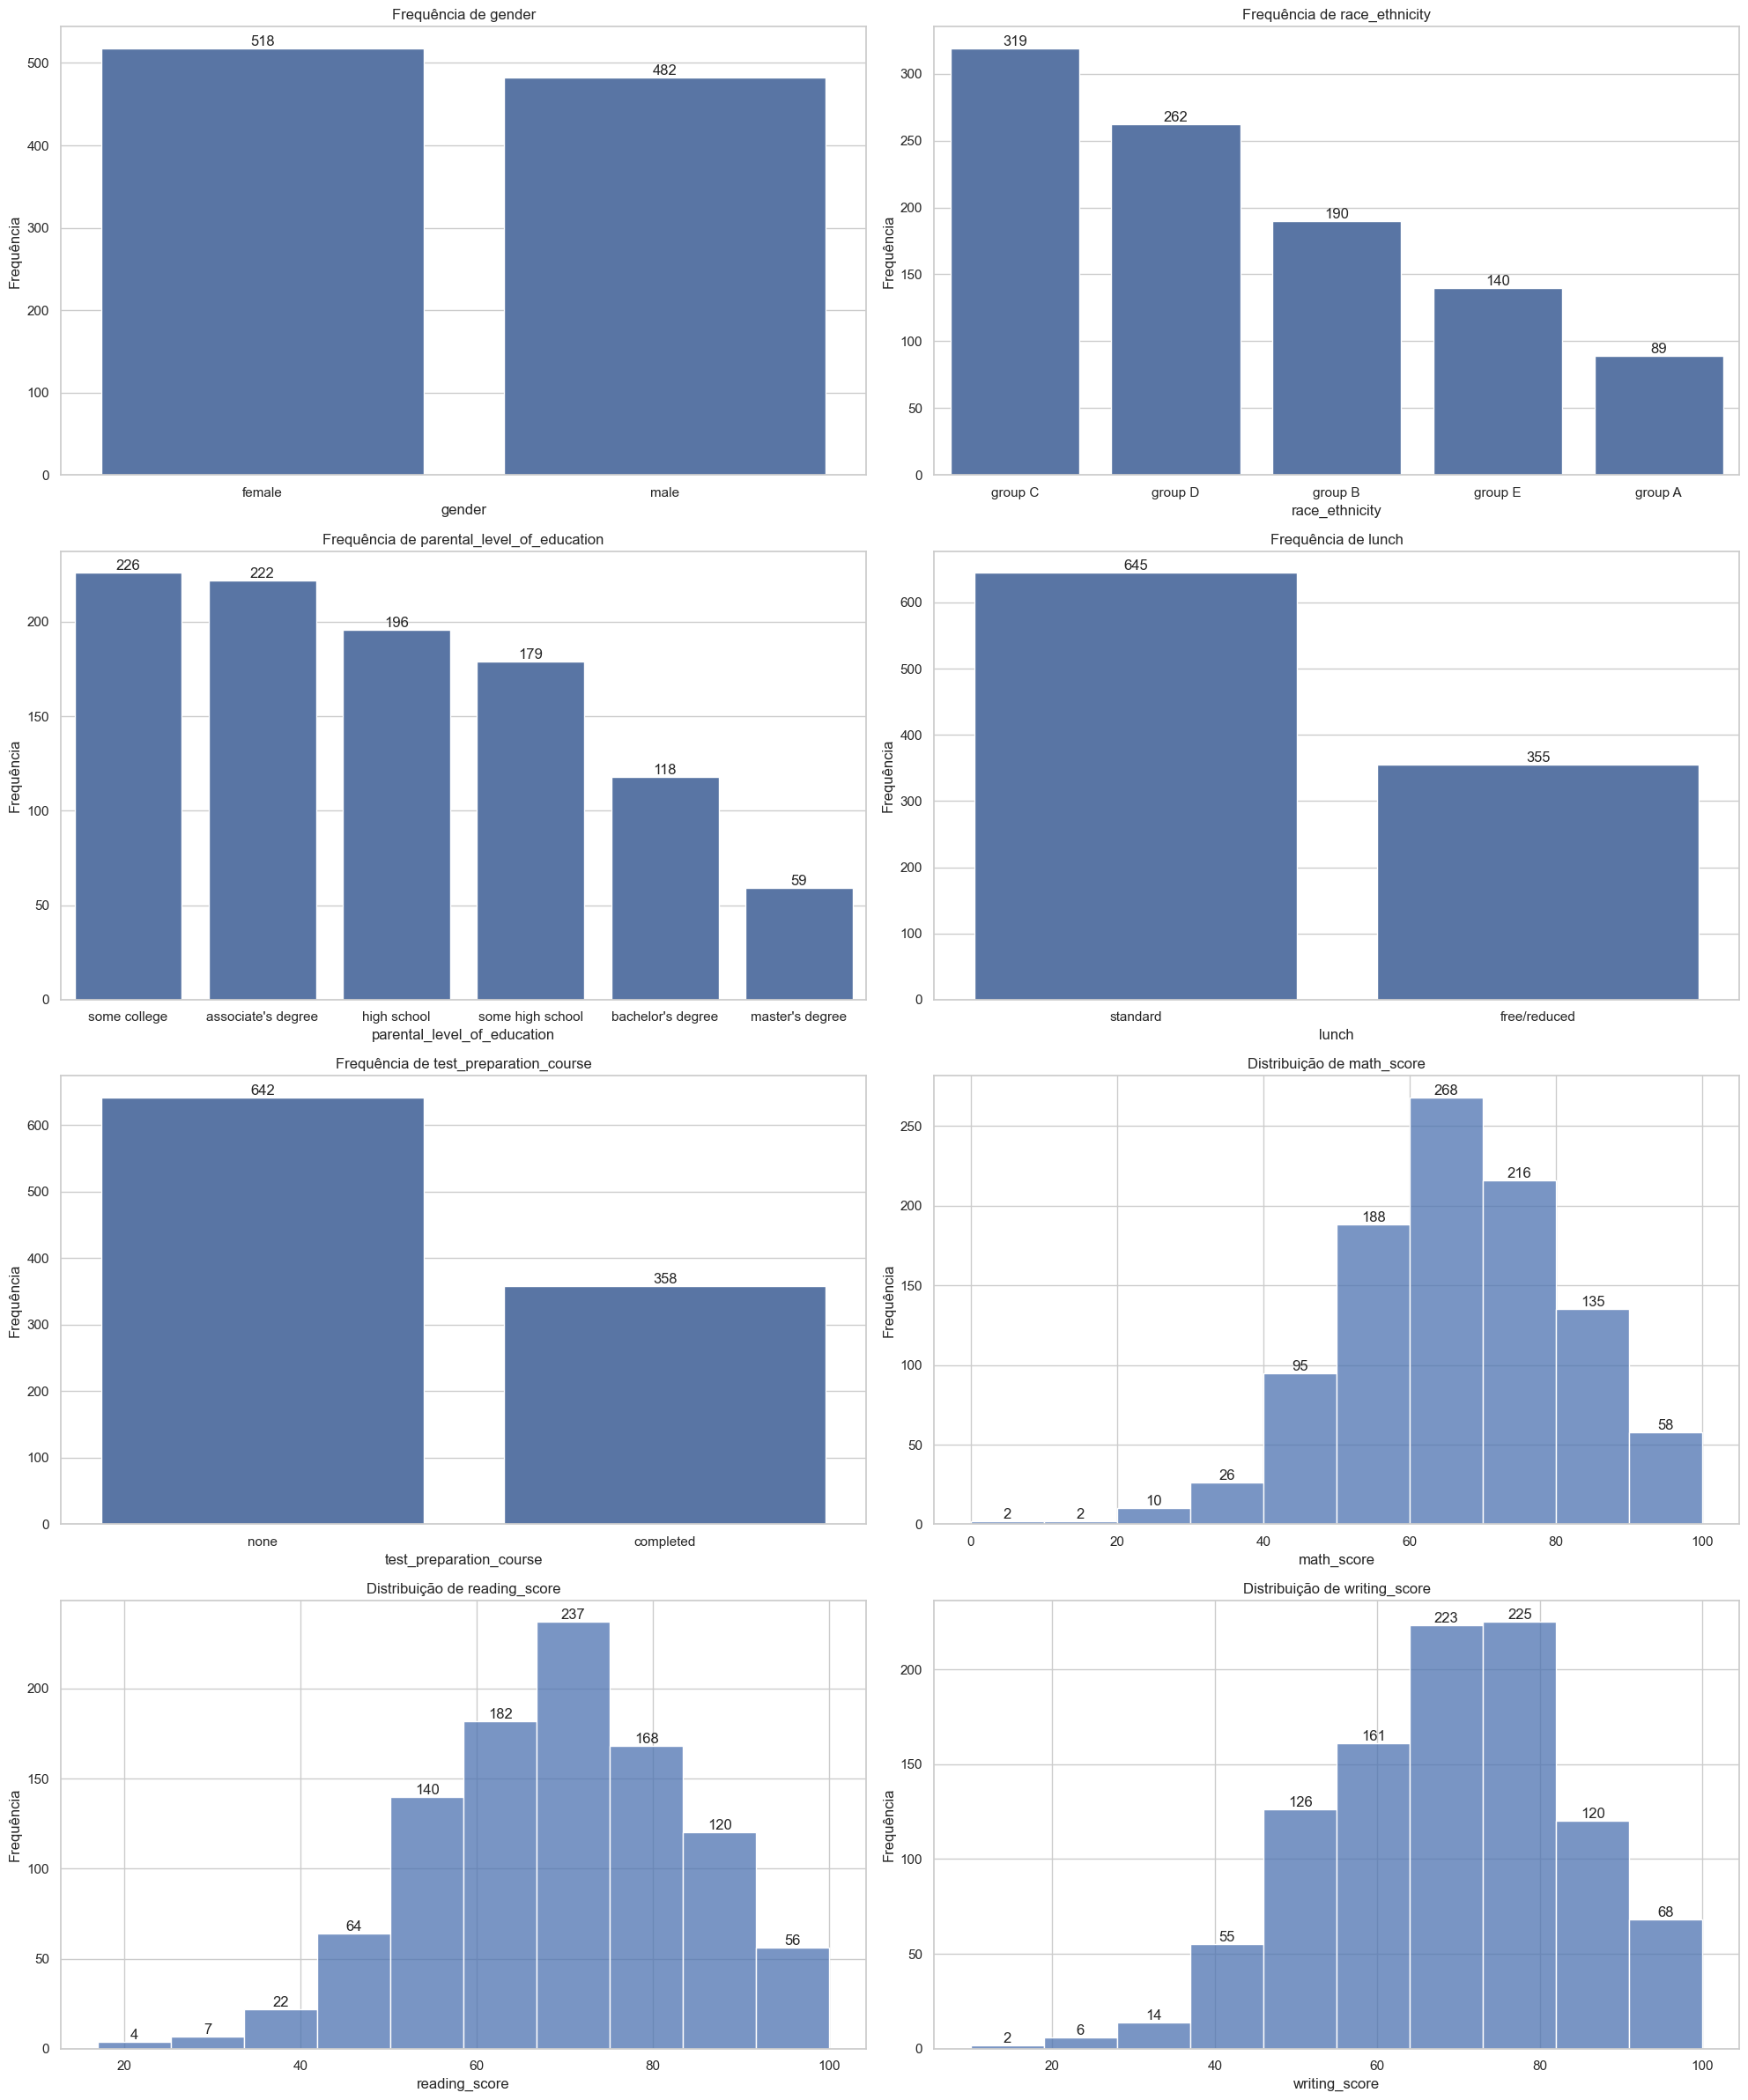

In [55]:
# Lista de colunas para os gráficos
colunas = ["gender","race_ethnicity","parental_level_of_education","lunch","test_preparation_course","math_score","reading_score","writing_score"]

# Número de linhas e colunas para os subplots
n_linhas = int(np.ceil(len(colunas) / 2))
n_cols = 2

# Criar uma nova figura com subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(20, 6 * n_linhas))

# Criar um gráfico para cada coluna
for i, coluna in enumerate(colunas):
    # Obter o subplot atual
    ax = axes[i // n_cols, i % n_cols]
    
    # Verificar se a coluna é numérica ou categórica
    if pd.api.types.is_numeric_dtype(dados[coluna]):
        # Histograma para variáveis numéricas
        plot = sns.histplot(dados[coluna], bins=10, kde=False, ax=ax)
        plot.set_title('Distribuição de ' + coluna)
        plot.set_ylabel('Frequência')
        #plot.xaxis.set_label_coords(0.5, -0.15)  # Ajustar a posição do rótulo do eixo x
        plot.bar_label(plot.containers[0])  # Adicionar rótulos de frequência
    else:
        # Gráfico de barras para variáveis categóricas
        plot = sns.countplot(x=coluna, data=dados, order = dados[coluna].value_counts().index, ax=ax)
        plot.set_title('Frequência de ' + coluna)
        plot.set_ylabel('Frequência')
        #plot.xaxis.set_label_coords(0.5, -0.15)  # Ajustar a posição do rótulo do eixo x
        plot.bar_label(plot.containers[0])  # Adicionar rótulos de frequência

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

### Gráfico Circular

Foi feito apenas das variáveis qualitativas, pois das quantitativas o gráfico fica muito subdividido e se torna difícil analisá-lo.

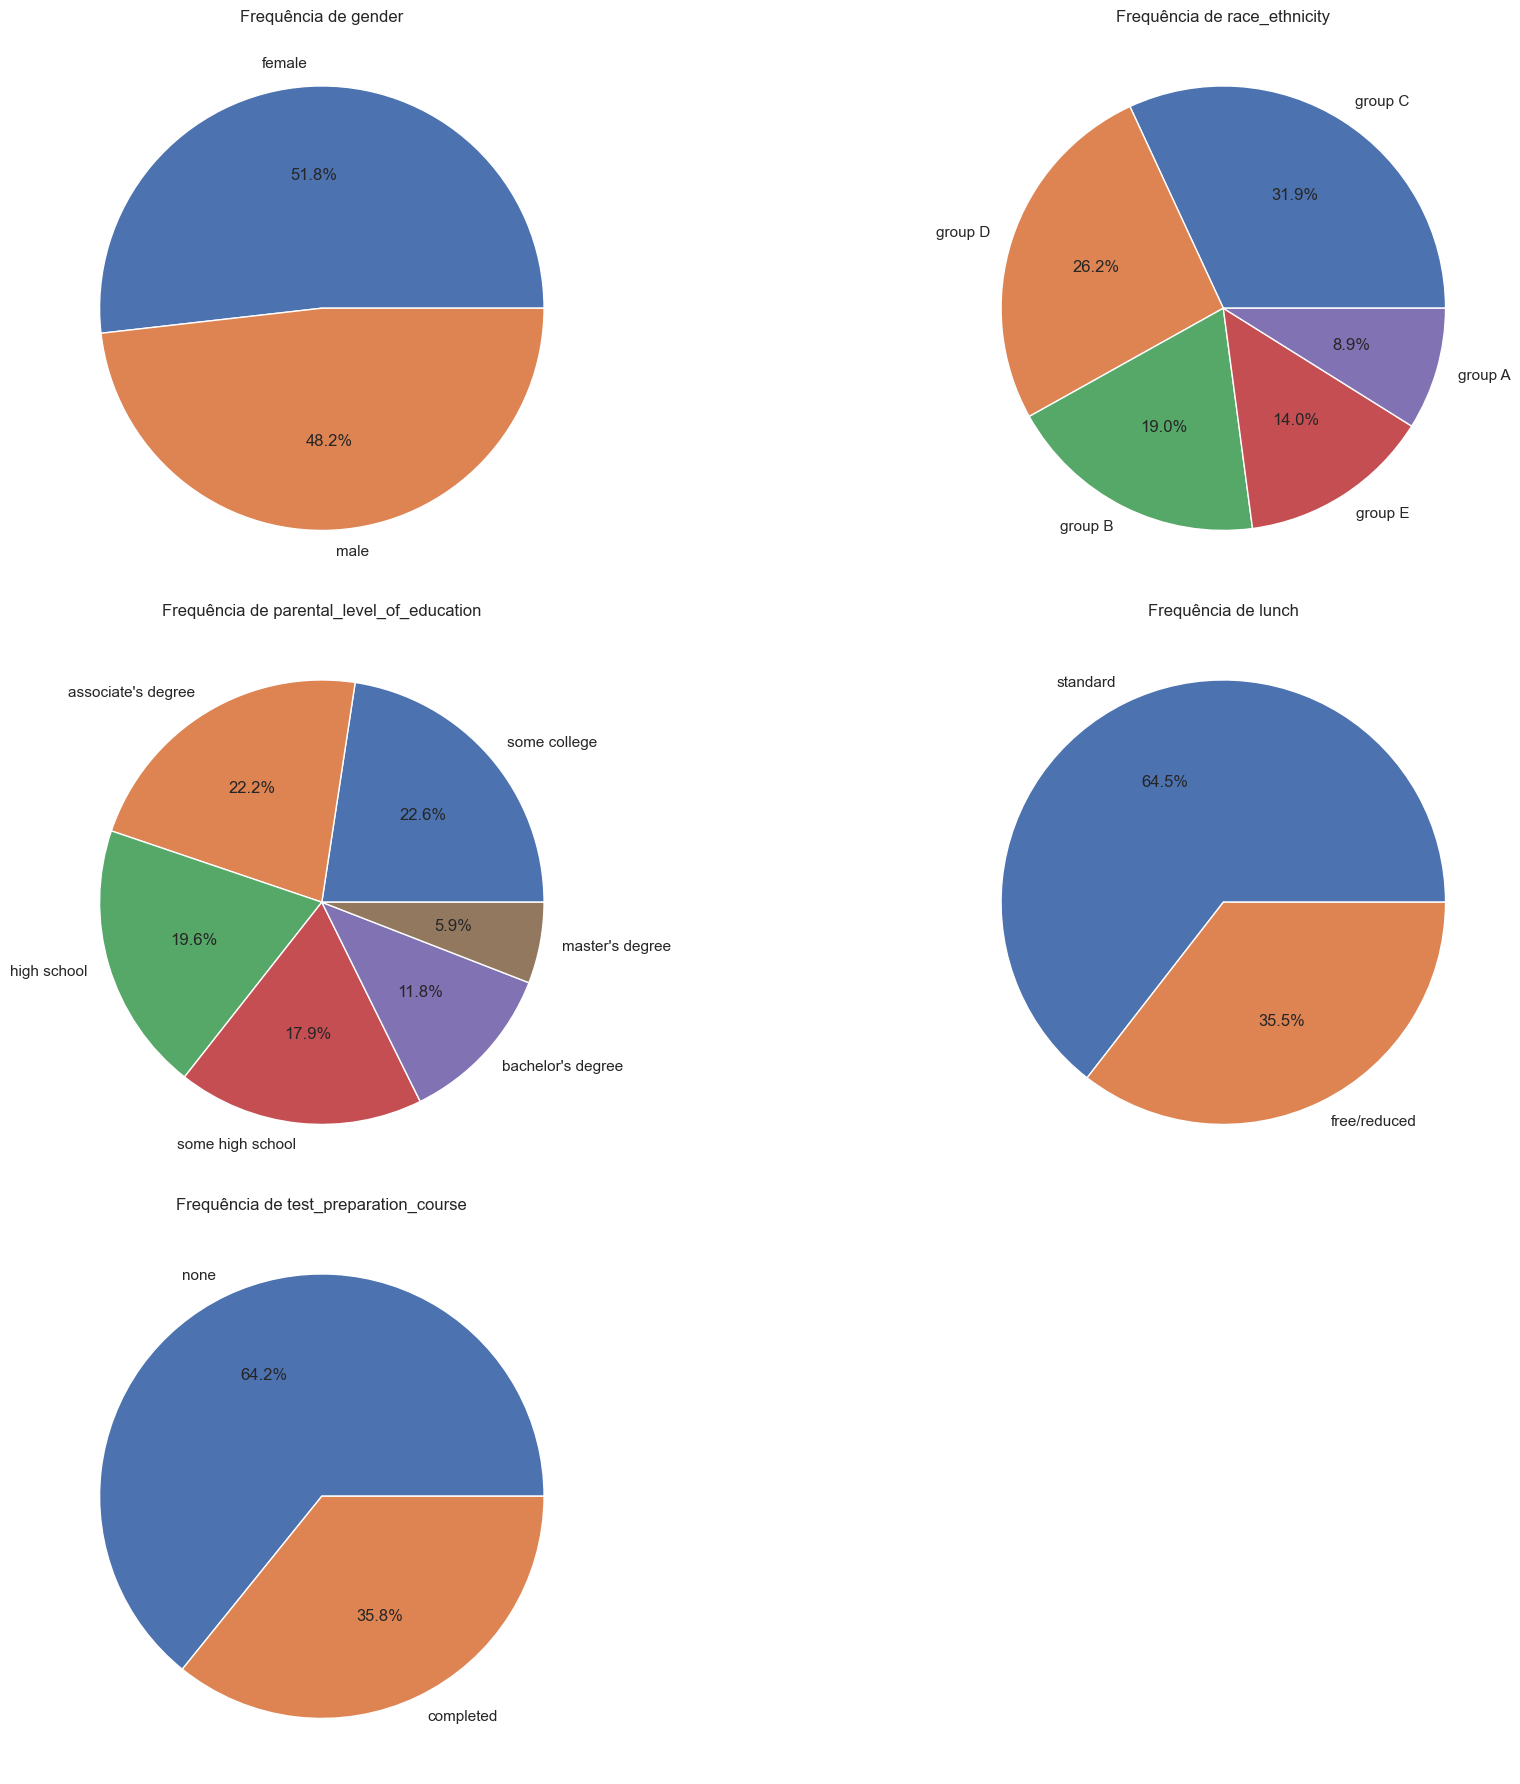

In [56]:
# Lista de colunas para os gráficos
colunas_qualitativas = ["gender","race_ethnicity","parental_level_of_education","lunch","test_preparation_course"]

# Número de linhas e colunas para os subplots
n_linhas = int(np.ceil(len(colunas_qualitativas) / 2))
n_cols = 2

# Criar uma nova figura com subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(20, 6 * n_linhas))

# Criar um gráfico de pizza para cada coluna
for i, coluna in enumerate(colunas_qualitativas):
    # Obter o subplot atual
    ax = axes[i // n_cols, i % n_cols]
    
    # Gráfico de pizza para variáveis categóricas
    plot = dados[coluna].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    plot.set_title('Frequência de ' + coluna)
    plot.set_ylabel('')

# Remover o último subplot se ele estiver vazio
if len(colunas_qualitativas) % 2 != 0:
    fig.delaxes(axes[n_linhas - 1, n_cols - 1])

# Ajustar o layout para evitar sobreposição e adicionar espaço entre os subplots
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

### Histograma


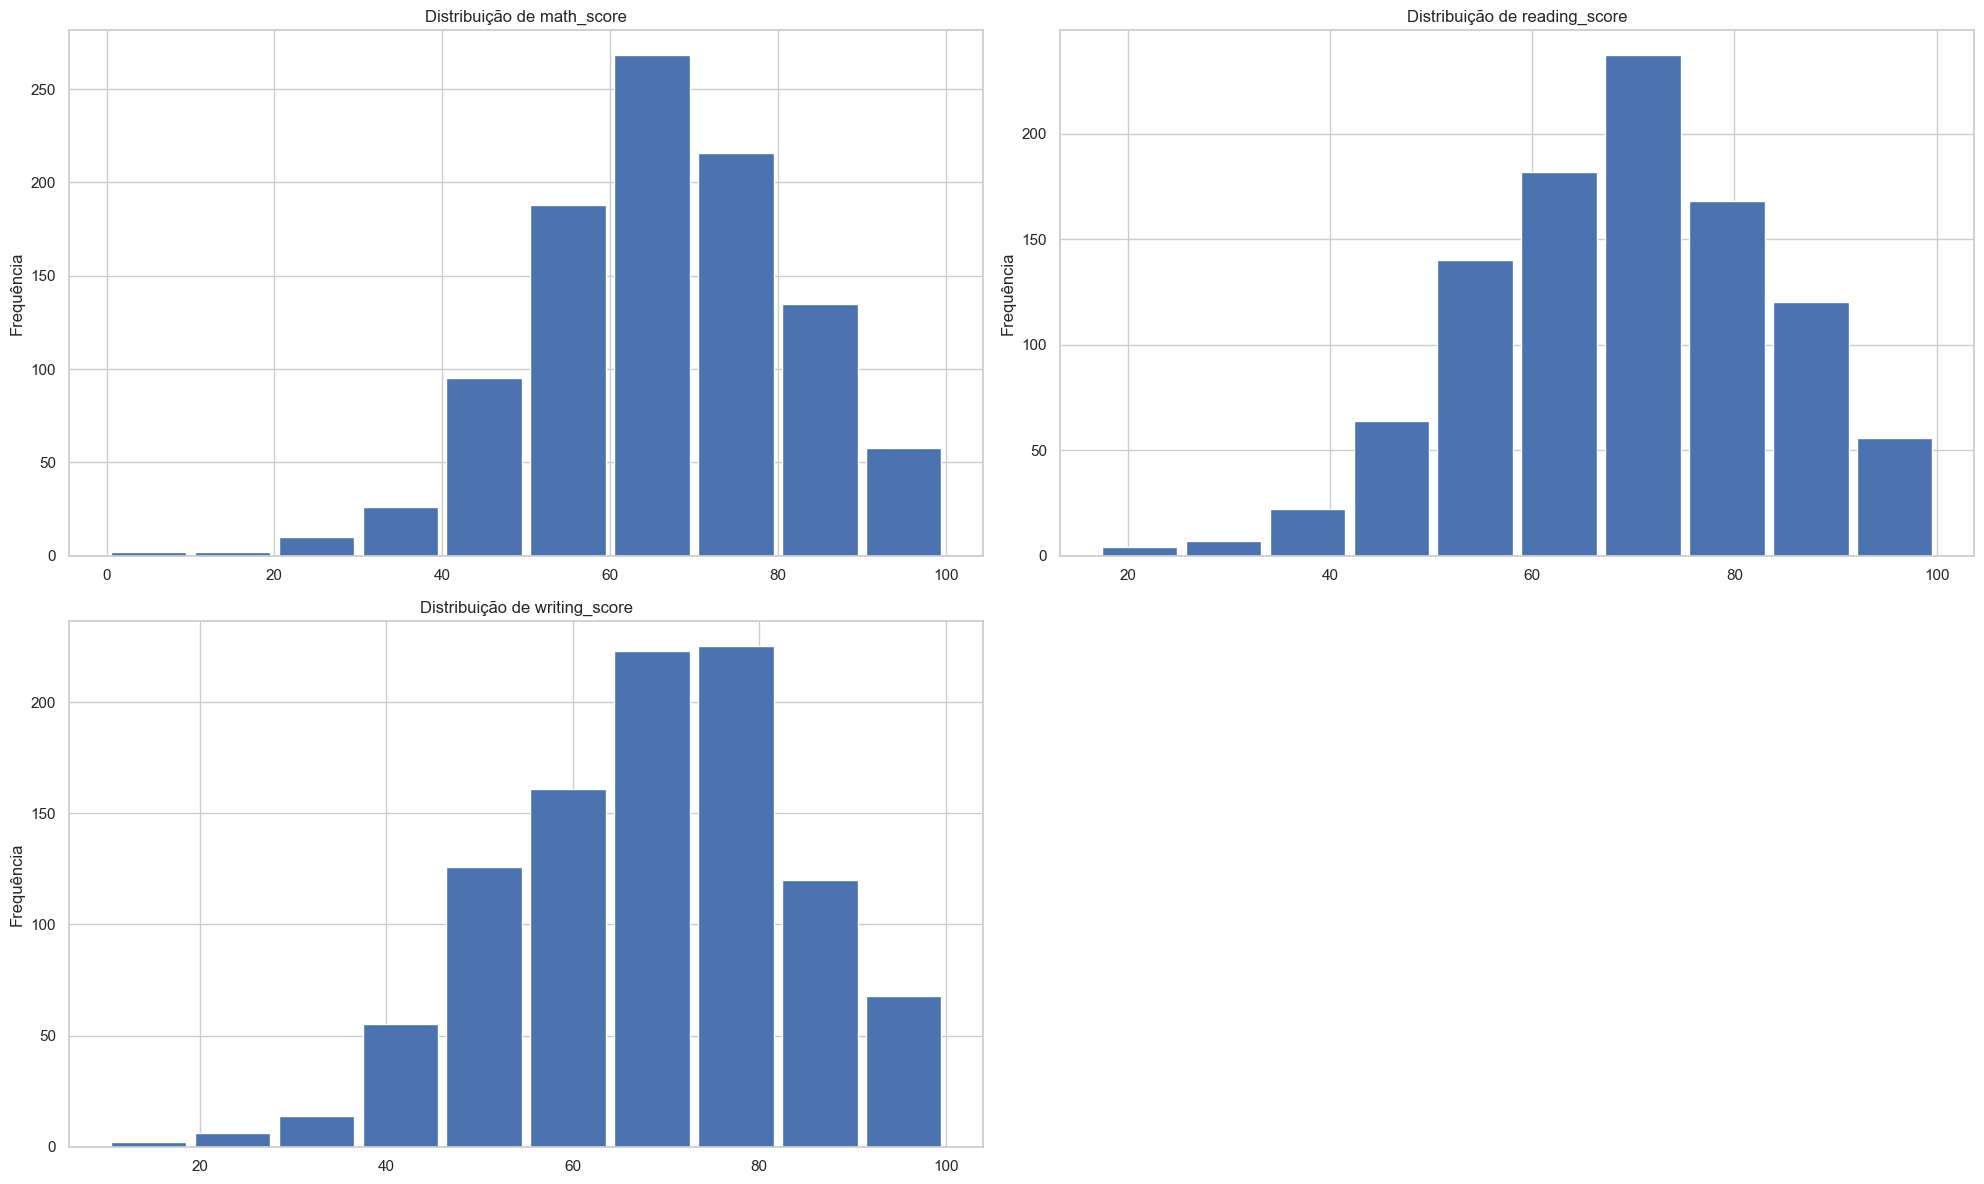

In [57]:
# Lista de colunas para os gráficos
colunas_quantitativas = ["math_score","reading_score","writing_score"]

# Número de linhas e colunas para os subplots
n_linhas = int(np.ceil(len(colunas_quantitativas) / 2))
n_cols = 2

# Criar uma nova figura com subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(20, 6 * n_linhas))

# Criar um histograma para cada coluna
for i, coluna in enumerate(colunas_quantitativas):
    # Obter o subplot atual
    ax = axes[i // n_cols, i % n_cols]
    
    # Histograma para variáveis numéricas
    plot = dados[coluna].plot(kind='hist', bins=10, rwidth=0.9, ax=ax)
    plot.set_title('Distribuição de ' + coluna)
    plot.set_ylabel('Frequência')

# Remover o último subplot se ele estiver vazio
if len(colunas_quantitativas) % 2 != 0:
    fig.delaxes(axes[n_linhas - 1, n_cols - 1])

# Ajustar o layout para evitar sobreposição e adicionar espaço entre os subplots
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

### Boxplot

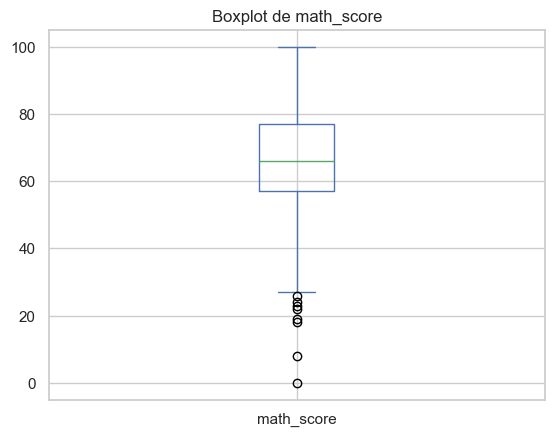

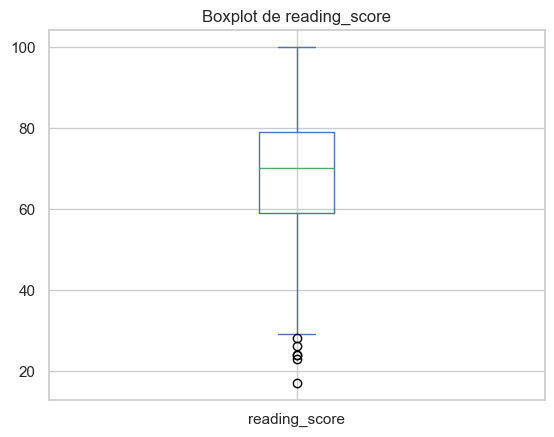

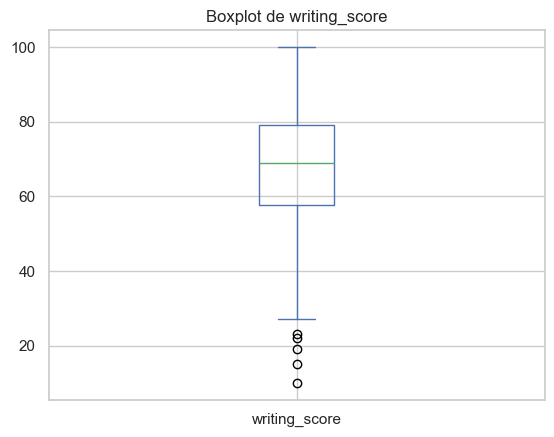

In [58]:
# Lista de colunas para os gráficos
colunas_quantitativas = ["math_score","reading_score","writing_score"]

# Criar um boxplot para cada coluna
for coluna in colunas_quantitativas:
    dados[coluna].plot(kind='box', title='Boxplot de ' + coluna)
    plt.show()

### Diagrama de Dispersão

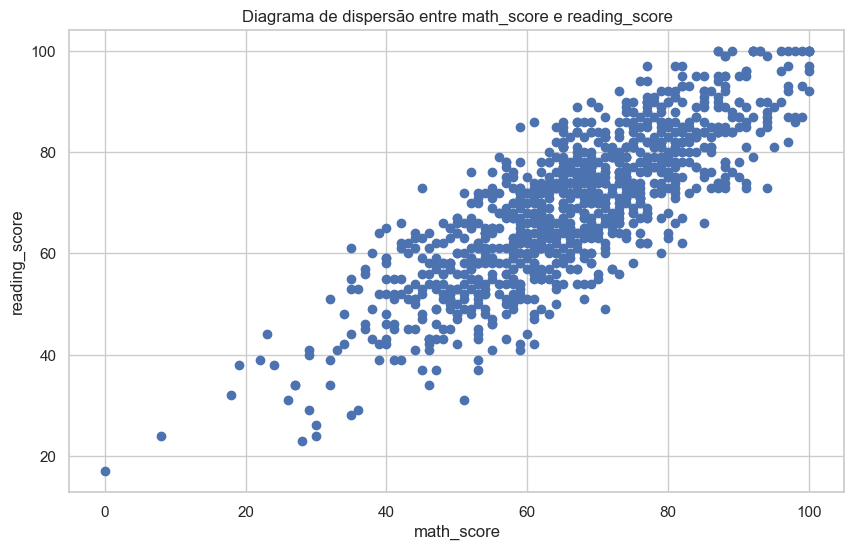

In [59]:
# Criar um diagrama de dispersão para "math_score" e "reading_score"
plt.figure(figsize=(10, 6))
plt.scatter(dados['math_score'], dados['reading_score'])
plt.title('Diagrama de dispersão entre math_score e reading_score')
plt.xlabel('math_score')
plt.ylabel('reading_score')
plt.show()

O conjunto de pontos no gráfico de dispersão está ascendente, isso indica uma correlação positiva entre as duas variáveis.

Neste caso, essa correlação positiva entre "math_score" e "reading_score" significa que, em geral, os estudantes que obtêm pontuações mais altas em matemática também tendem a obter pontuações mais altas em leitura.

Isso não significa necessariamente que ser bom em matemática faz alguém ser bom em leitura, ou vice-versa. Pode haver outras variáveis em jogo que afetam ambas as pontuações. No entanto, a correlação positiva sugere que há uma relação entre as duas pontuações.

### Medidas Resumo e Representação Gráfica 

- Vamos considerar "math_score" como a variável quantitativa e "gender" como a variável qualitativa

Resumo:
         count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0
male    482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0

Moda:
 gender
female    65
male      62
Name: math_score, dtype: int64

IQR:
 gender
female    20.0
male      20.0
Name: math_score, dtype: float64


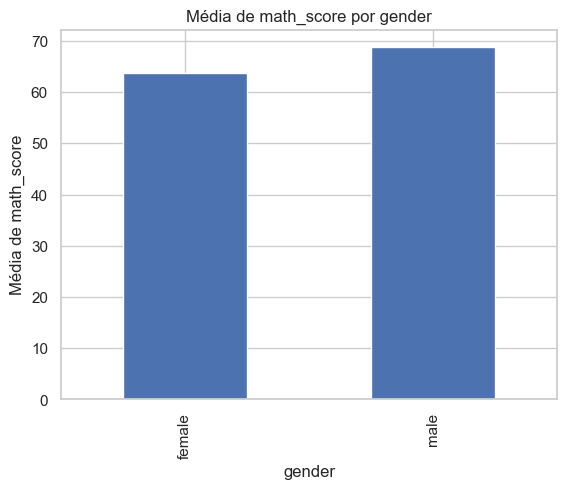

In [61]:
# Calcular as medidas resumo para "math_score" agrupadas por "gender"
resumo = dados.groupby('gender')['math_score'].describe()
print("Resumo:\n", resumo)

# Calcular a moda para "math_score" agrupadas por "gender"
moda = dados.groupby('gender')['math_score'].agg(pd.Series.mode)
print("\nModa:\n", moda)

# Calcular o IQR para "math_score" agrupadas por "gender"
iqr = dados.groupby('gender')['math_score'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("\nIQR:\n", iqr)

# Criar um gráfico de barras para as médias de "math_score" agrupadas por "gender"
dados.groupby('gender')['math_score'].mean().plot(kind='bar', title='Média de math_score por gender')
plt.ylabel('Média de math_score')
plt.show()